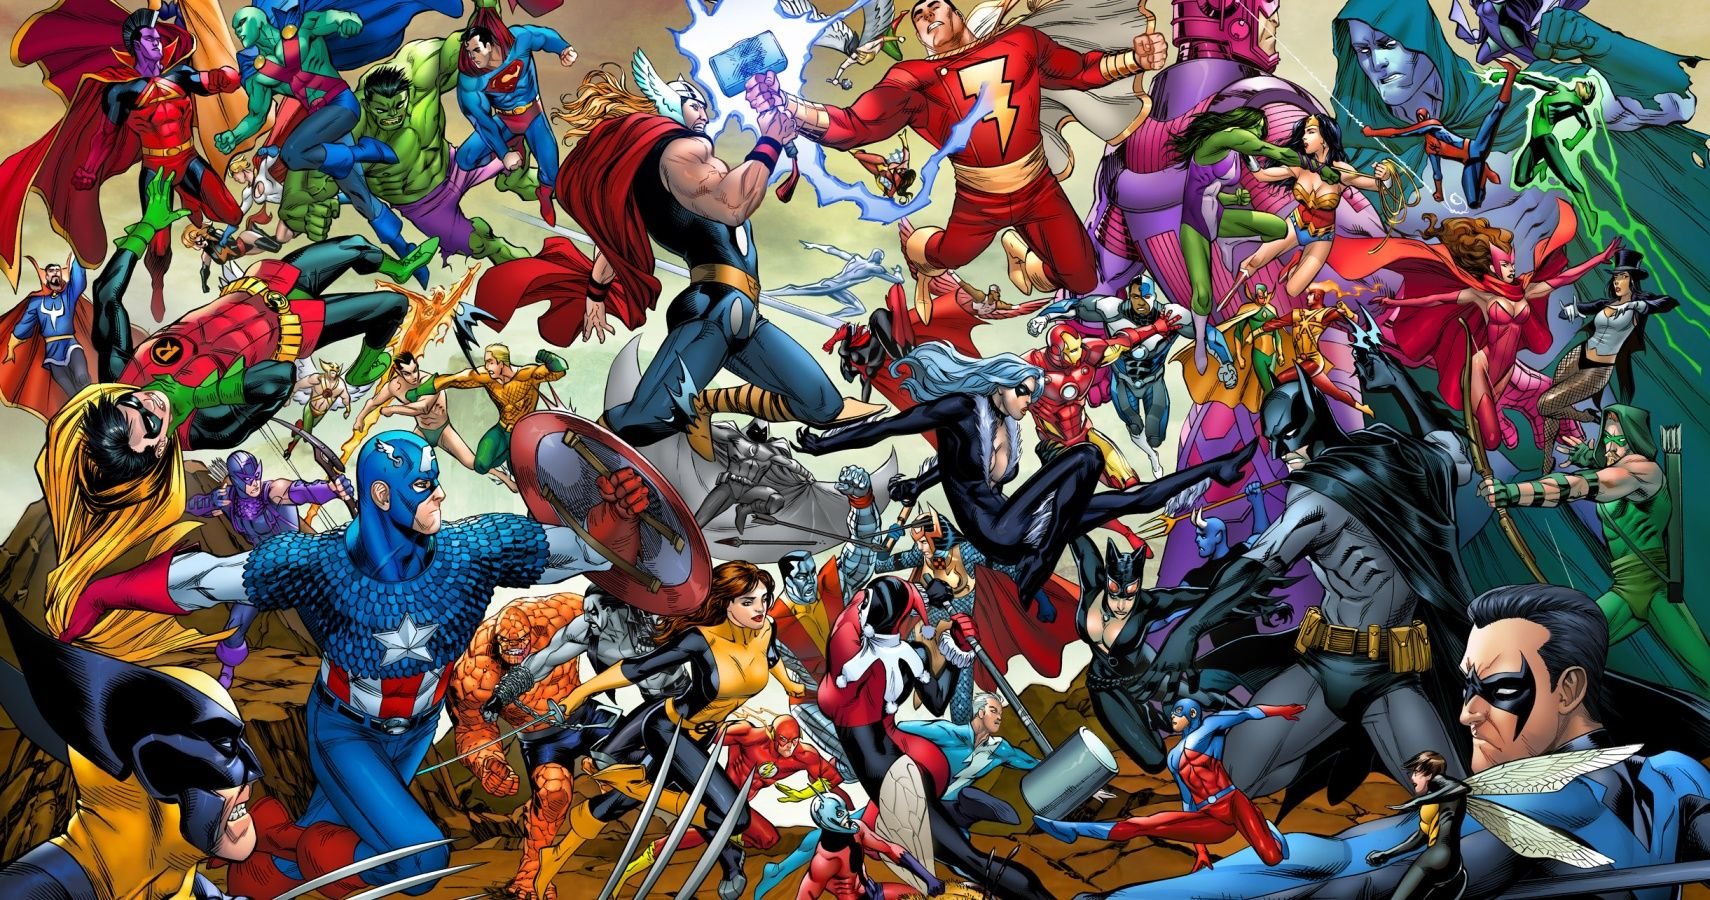

 - DC Comics, Inc. is an American comic book publisher. It is the publishing unit of DC Entertainment, a subsidiary of Warner Bros. since 1967. DC Comics is one of the largest and oldest American comic book companies, and produces material featuring numerous culturally iconic heroic characters including: Superman, Batman, Wonder Woman, The Flash, Green Lantern, Martian Manhunter, Nightwing, Green Arrow, Starfire, Aquaman, and Cyborg.

   Most of their material takes place in the fictional DC Universe, which also features teams such as the Justice League, the Justice Society of America, the Suicide Squad, and the Teen Titans, and well-known villains such as The Joker, Lex Luthor, Catwoman, Darkseid, Sinestro, Brainiac, Black Adam, Ra's al Ghul and Deathstroke. The company has also published non-DC Universe-related material, including Watchmen, V for Vendetta, and many titles under their alternative imprint Vertigo.
   
   The initials "DC" came from the company's popular series Detective Comics, which featured Batman's debut and subsequently became part of the company's name. Originally in Manhattan at 432 Fourth Avenue, the DC Comics offices have been located at 480 and later 575 Lexington Avenue; 909 Third Avenue; 75 Rockefeller Plaza; 666 Fifth Avenue; and 1325 Avenue of the Americas. DC had its headquarters at 1700 Broadway, Midtown Manhattan, New York City, but it was announced in October 2013 that DC Entertainment would relocate its headquarters from New York to Burbank, California in April 2015.
   
   Random House distributes DC Comics' books to the bookstore market,while Diamond Comic Distributors supplies the comics shop specialty market.DC Comics and its longtime major competitor Marvel Comics (acquired in 2009 by The Walt Disney Company, WarnerMedia's main competitor) together shared approximately 70% of the American comic book market in 2017.
   
-   Marvel Comics is the brand name and primary imprint of Marvel Worldwide Inc., formerly Marvel Publishing, Inc. and Marvel Comics Group, a publisher of American comic books and related media. In 2009, The Walt Disney Company acquired Marvel Entertainment, Marvel Worldwide's parent company.

    Marvel started in 1939 as Timely Publications, and by the early 1950s, had generally become known as Atlas Comics. The Marvel branding began in 1961, the year that the company launched The Fantastic Four and other superhero titles created by Steve Ditko, Stan Lee, Jack Kirby and many others.

    Marvel counts among its characters such well-known superheroes as Spider-Man, Iron Man, Captain America, Thor, the Hulk, Captain Marvel, Black Panther, Deadpool, Silver Surfer, Doctor Strange, Wolverine, Daredevil, Ghost Rider and the Punisher, such teams as the Avengers, the X-Men, the Fantastic Four, the Inhumans and the Guardians of the Galaxy, and supervillains including Thanos, Doctor Doom, Magneto, Red Skull, Green Goblin, Ultron, Doctor Octopus, Loki, Galactus, and Venom. Most of Marvel's fictional characters operate in a single reality known as the Marvel Universe, with most locations mirroring real-life places; many major characters are based in New York City.

In [1]:
import pandas as pd

marvel = pd.read_csv("marvel-wikia-data.csv")
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [2]:
dc = pd.read_csv("dc-wikia-data.csv")
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


Description for various variables are as follows :

- page_id - The unique identifier for that characters page within the wikia
- name - The name of the character
- urlslug - The unique url within the wikia that takes you to the character
- ID - The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
- ALIGN	- If the character is Good, Bad or Neutral
- EYE - Eye color of the character
- HAIR - Hair color of the character
- SEX - Sex of the character (e.g. Male, Female, etc.)
- GSM - If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
- ALIVE	- If the character is alive or deceased
- APPEARANCES - The number of appareances of the character in comic books
- FIRST APPEARANCE - The month and year of the character's first appearance in a comic book, if available
- YEAR - The year of the character's first appearance in a comic book, if available

**Comparisions of DC and Marvel Comics characters**

In [3]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

In [4]:
sex_count = dc['SEX'].value_counts()
sex1_count = marvel['SEX'].value_counts()
trace1 = go.Bar(
    x=sex_count.index,
    y=sex_count.values,
    name='DC'
)
trace2 = go.Bar(
    x=sex1_count.index,
    y=sex1_count.values,
    name='Marvel'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title= 'Gender Comparisions in between DC and Marvel'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [5]:
sex_count = dc['ID'].value_counts()
sex1_count = marvel['ID'].value_counts()
trace1 = go.Bar(
    x=sex_count.index,
    y=sex_count.values,
    name='DC'
)
trace2 = go.Bar(
    x=sex1_count.index,
    y=sex1_count.values,
    name='Marvel'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title= 'Identity comparisions in between DC and Marvel'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [6]:
sex_count = dc['ALIGN'].value_counts()
sex1_count = marvel['ALIGN'].value_counts()
trace1 = go.Bar(
    x=sex_count.index,
    y=sex_count.values,
    name='DC'
)
trace2 = go.Bar(
    x=sex1_count.index,
    y=sex1_count.values,
    name='Marvel'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title= 'How many good and bad characters in between DC and Marvel?'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [7]:
sex_count = dc['ALIVE'].value_counts()
sex1_count = marvel['ALIVE'].value_counts()
trace1 = go.Bar(
    x=sex_count.index,
    y=sex_count.values,
    name='DC'
)
trace2 = go.Bar(
    x=sex1_count.index,
    y=sex1_count.values,
    name='Marvel'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title= 'Alive or Dead ?'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [8]:
trace_high = go.Scatter(
                x=marvel.Year,
                y=marvel.APPEARANCES,
                name = "Marvel Appearances",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=dc.YEAR,
                y=dc.APPEARANCES,
                name = "DC Appearances",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Appearances with respect to Origin year',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1Y',
                     step='year',
                     stepmode='backward'),
                dict(count=6,
                     label='6Y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series with Rangeslider")

In [9]:
dc_top = dc.iloc[dc.groupby(dc['ALIGN'])['APPEARANCES'].idxmax()][['name', 'ALIGN']]

*Top appearances in alignment of the characters in DC*

In [10]:
dc_top

,name,ALIGN
19,Alexander Luthor (New Earth),Bad Characters
0,Batman (Bruce Wayne),Good Characters
20,Roy Harper (New Earth),Neutral Characters
387,Owen Mercer (New Earth),Reformed Criminals


In [11]:
dc_alive = dc.iloc[dc.groupby(dc['ALIVE'])['APPEARANCES'].idxmax()][['name', 'ALIVE']]

*Top appearances depending on whether they continue to exist in DC*

In [12]:
dc_alive

,name,ALIVE
11,Alan Scott (New Earth),Deceased Characters
0,Batman (Bruce Wayne),Living Characters


In [13]:
marvel_top = marvel.iloc[marvel.groupby(marvel['ALIGN'])['APPEARANCES'].idxmax()][['name', 'ALIGN']]

*Top appearances in alignment of the characters in Marvel*

In [14]:
marvel_top

,name,ALIGN
43,Victor von Doom (Earth-616),Bad Characters
0,Spider-Man (Peter Parker),Good Characters
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters


In [15]:
marvel_alive = marvel.iloc[marvel.groupby(marvel['ALIVE'])['APPEARANCES'].idxmax()][['name', 'ALIVE']]

*Top appearances depending on whether they continue to exist in Marvel*

In [16]:
marvel_alive

,name,ALIVE
21,Charles Xavier (Earth-616),Deceased Characters
0,Spider-Man (Peter Parker),Living Characters


**Visualisation**

*Top 20 characters of DC*

In [17]:
dc['comics']= 'DC'

In [18]:
dc= dc.truncate(before=-1, after=20)

In [19]:
import networkx as nx
FG = nx.from_pandas_edgelist(dc, source='comics', target='name', edge_attr=True)

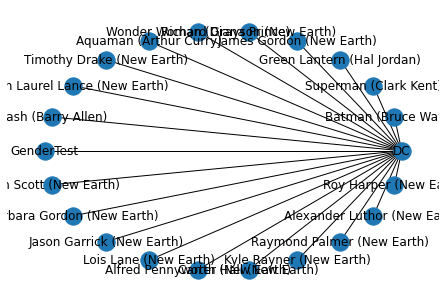

In [20]:
nx.draw_circular(FG, with_labels=True)

*Top 20 characters of Marvel*

In [21]:
marvel['comics'] = 'Marvel'

In [22]:
marvel = marvel.truncate(before=-1, after=20)

In [23]:
import networkx as nx
FG1 = nx.from_pandas_edgelist(marvel, source='comics', target='name', edge_attr=True,)

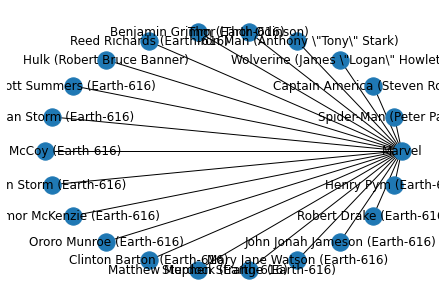

In [24]:
nx.draw_circular(FG1, with_labels=True)